### First Look at the Data
Import the data from the csv file into a dataframe and take a first look at it.

In [91]:
import pandas as pd

sleep_health_and_lifestyle_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

sleep_health_and_lifestyle_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


We see different features such as gender, age, occupation, and so on. These feautures can be isolated and split into different groupings of (1) participant identity, (2) sleep statistics, (3) physical activity, and (4) health conditions. To start, let us extract all the information of the participants and understand better who they are.

### Understanding the Different Groupings of Features
#### Participant Identity

In [92]:
num_people = len(sleep_health_and_lifestyle_df)

min_age = sleep_health_and_lifestyle_df['Age'].min()
max_age = sleep_health_and_lifestyle_df['Age'].max()

occupations = sleep_health_and_lifestyle_df['Occupation'].unique()

print(f"Number of participants: {num_people}")
print(f"Range of ages: {min_age} - {max_age}")
print("Different occupations:", ', '.join(occupations))

Number of participants: 374
Range of ages: 27 - 59
Different occupations: Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager


With this information there are a couple of generalizations we can make. We know that, for the most part, all of these participants work white-collars job. The age range of participants are people who are in or near to the 'middle' of their life. There are only 374 participants, so the sample size in comparison to rest of the world is quite small. There is also a lack of information in where there participants hail from. 

Let us dive a little deeper into the age and occupation range and get a better understanding of the split.

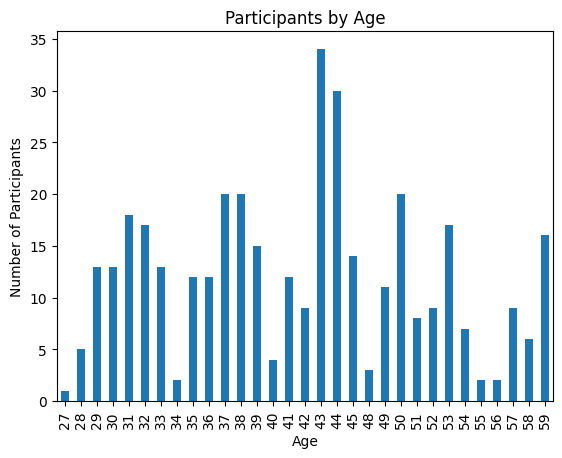

In [93]:
import matplotlib.pyplot as plt

age_counts = sleep_health_and_lifestyle_df['Age'].value_counts()
age_counts.sort_index(inplace=True)

age_counts.plot(kind='bar')
plt.title('Participants by Age')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()
# Include this? There is an interesting wave like pattern in the ages received, I wonder why.
# plt.plot(age_counts.index, age_counts.values)
# plt.show()
# plt.xlabel('Age')
# plt.ylabel('Number of Participants')


From the age distribution, we see a good spread of participants with a high number in the 43-44 range. There is an interesting correlation between age and number of participants though in almost wave like pattern. These waves go through a 7-8 year cycle. However, we do not see any participants in their early life or older life.


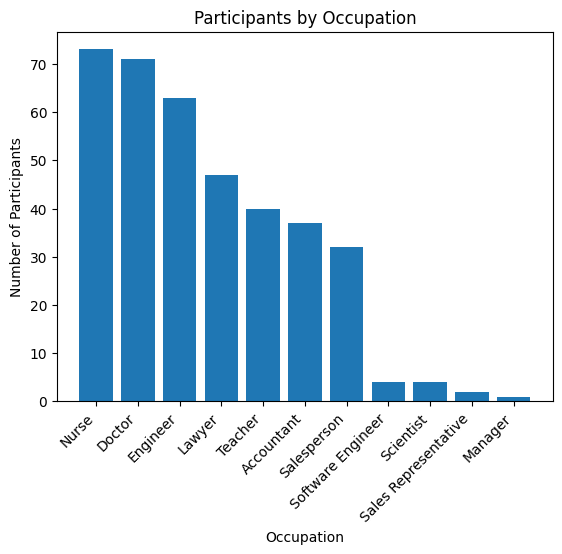

In [94]:
occupation_counts = sleep_health_and_lifestyle_df['Occupation'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values)
plt.title('Participants by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.show()


In the occupation distribution we see a low variation in the occupations. The majority of participants are nurses, doctors, and engineers. Then we see a good chunk represent lawyers, teachers, accountants, and salespeople. Finally, we see a very small number of software engineers, scientists, sales representatives, and managers. 

Now that we have a better understanding of the participants, let us learn more about their sleep statistics.

#### Sleep Statistics

Here we see two main features provided for their sleep, duration and quality. Let us plot both of these to visualize the split up of data.

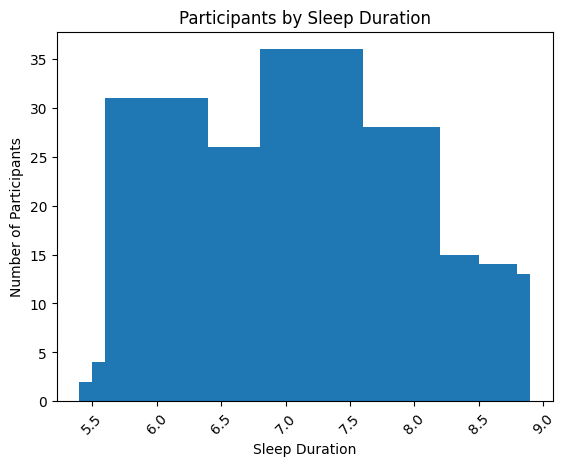

5.8


In [95]:
sleep_duration_counts = sleep_health_and_lifestyle_df['Sleep Duration'].value_counts()

plt.bar(sleep_duration_counts.index, sleep_duration_counts.values)
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Participants')
plt.title('Participants by Sleep Duration')
plt.xticks(rotation=45)
plt.show()

This bar graph is a bit clogged, but now we see the range of sleep duration. Let us split these up in bigger categories of [5.5, 6), [6 - 6.5), and so on.

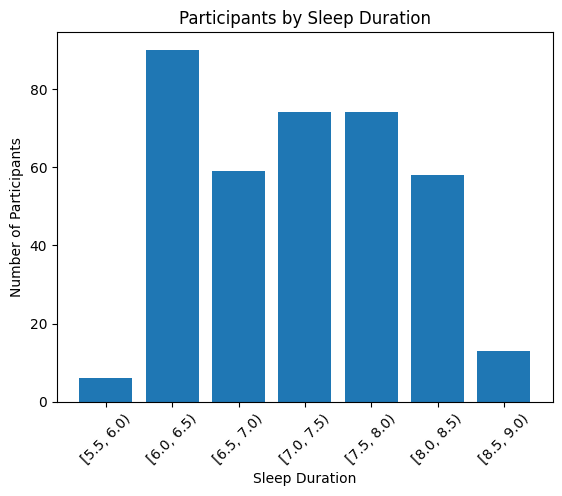

In [96]:
sleep_duration_bins = [5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]

sleep_duration_counts = pd.cut(sleep_health_and_lifestyle_df['Sleep Duration'], bins=sleep_duration_bins, right=False).value_counts().sort_index()

plt.bar(sleep_duration_counts.index.astype(str), sleep_duration_counts.values)
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Participants')
plt.title('Participants by Sleep Duration')
plt.xticks(rotation=45)
plt.show()

Here we see the majority of people receiving between 6 to 8.4 hours of sleep, and the outliers in the 5.5 - 5.9 and 8.5 - 9.4 range. Given the common saying is get "6 to 8 hours of sleep", this shows that people in this dataset are hitting that mark. Later on, let's see if this correlates to better health conditions. For now, let us visualize the quality of sleep.

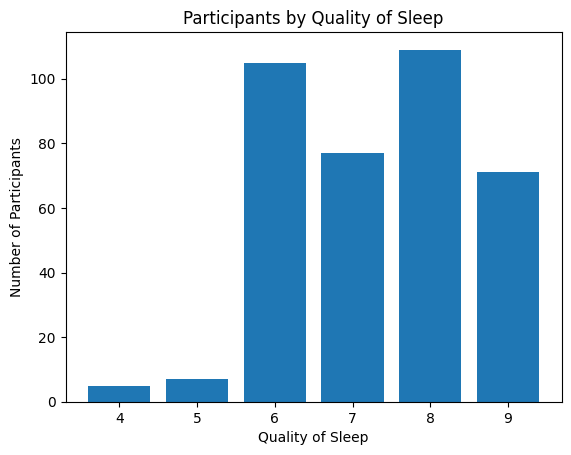

In [97]:
quality_of_sleep_counts = sleep_health_and_lifestyle_df['Quality of Sleep'].value_counts()

plt.bar(quality_of_sleep_counts.index, quality_of_sleep_counts.values)
plt.xlabel('Quality of Sleep')
plt.ylabel('Number of Participants')
plt.title('Participants by Quality of Sleep')
plt.show()

Based on this bar graph, it seems that a small part of the participants receive below average (4, 5) sleep, while the majority exist in the decent (6, 7) and good (8, 9) sleep. Interesting to note that no one said a number below 4 or above 9, a.k.a. 10.